### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

# Missing Data

## Show null percentages in each column as a bargraph

In [25]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

12684


/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

<Axes: >

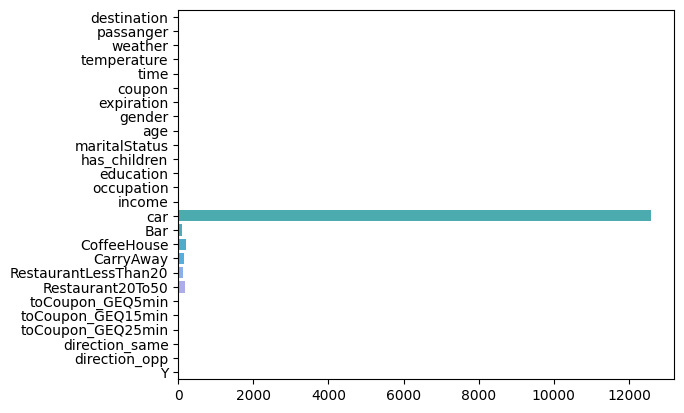

In [19]:
print(len(data))
sns.barplot(x=data.isna().sum(), y=data.columns)

3. Decide what to do about your missing data -- drop, replace, other...

In [23]:
data = data.drop(['car'], axis=1)

In [24]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [31]:
num_accepting_coupons = len(data.query('Y == 1'))
num_not_accepting_coupons = len(data.query('Y == 0'))

pct_accept =  num_accepting_coupons / len(data)
print(num_accepting_coupons, num_not_accepting_coupons, len(data), pct_accept)

7210 5474 12684 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

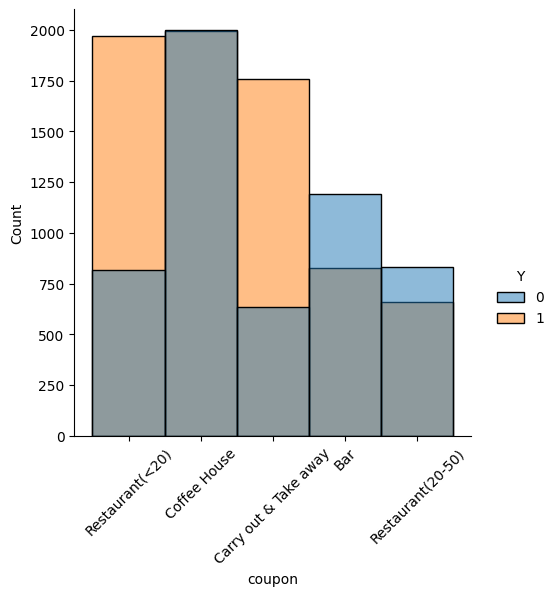

In [38]:
fig = sns.displot(data, x="coupon", hue="Y")
fig.tick_params(axis='x', rotation=45)

6. Use a histogram to visualize the temperature column.

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

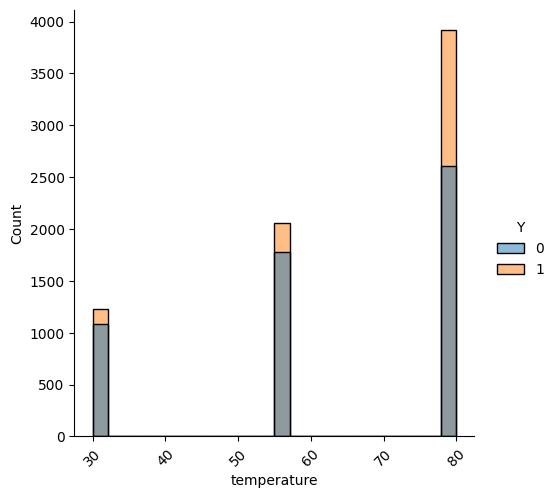

In [39]:
fig = sns.displot(data, x="temperature", hue="Y")
fig.tick_params(axis='x', rotation=45)

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

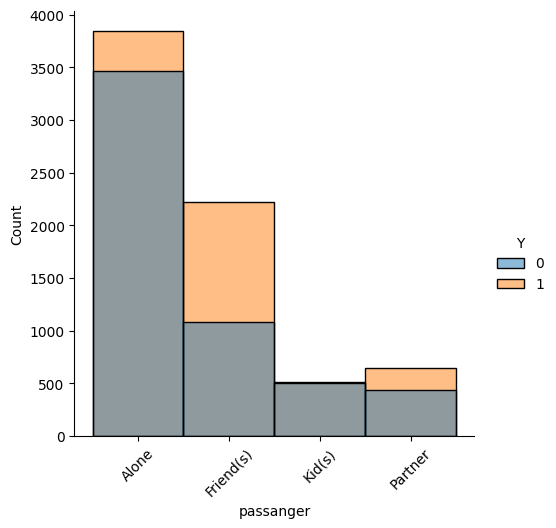

In [41]:
fig = sns.displot(data, x="passanger", hue="Y")
fig.tick_params(axis='x', rotation=45)

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

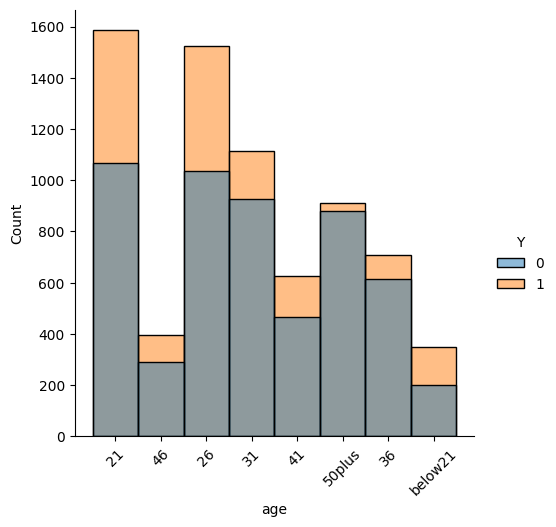

In [42]:
fig = sns.displot(data, x="age", hue="Y")
fig.tick_params(axis='x', rotation=45)

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

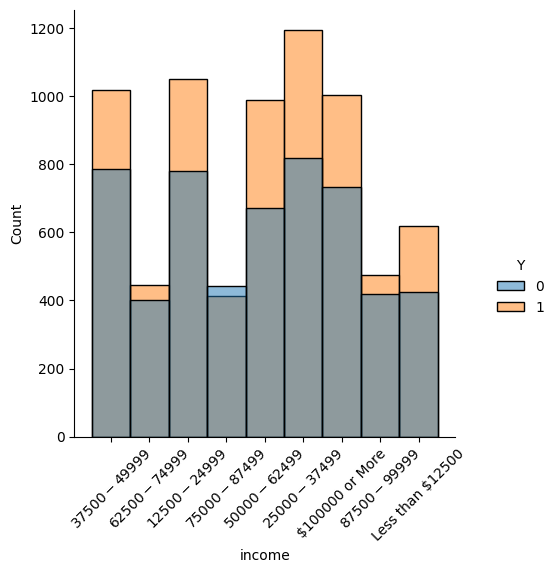

In [43]:
fig = sns.displot(data, x="income", hue="Y")
fig.tick_params(axis='x', rotation=45)

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

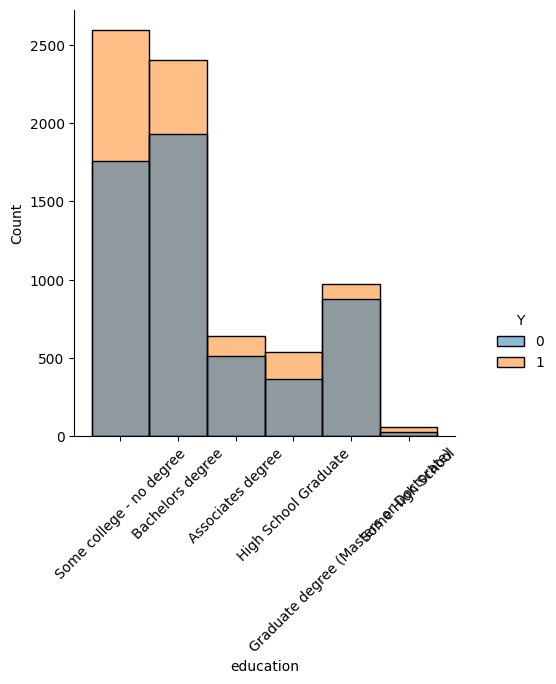

In [45]:
fig = sns.displot(data, x="education", hue="Y")
fig.tick_params(axis='x', rotation=45)

In [ ]:
print(data.columns)

expensive_restaurant_coupons_df = data.query('coupon == "Restaurant(20-50)"')
expensive_restaurant_coupons_df

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [50]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [58]:
bar_df = data.query('coupon == "Bar"')
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [60]:
num_accepted = len(bar_df.query("Y == 1"))
total = len(bar_df)
ratio = num_accepted / total
print(ratio)

0.41001487357461575


About 41% of the coupons for bars were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [68]:
print(bar_df['Bar'].value_counts())  # help get all possible distinct values

rows_bar_leq_3 = bar_df.query('Bar in ("never", "less1", "1~3")')
acceptance_rate_leq_3_bars = len(rows_bar_leq_3.query('Y == 1')) / len(rows_bar_leq_3)
print(acceptance_rate_leq_3_bars)

rows_bar_ge_3 = bar_df.query('Bar in ("4~8", "gt8")')
acceptance_rate_ge_3_bars = len(rows_bar_ge_3.query('Y == 1')) / len(rows_bar_ge_3)
print(acceptance_rate_ge_3_bars)

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
0.37061769616026713
0.7688442211055276


If the person did not go to a bar more than 3 times a month, they were only 33% likely to accept a coupon to visit a bar

Compared to this, if the person went to the bar more than 3 times, they accepted the coupon to visit a bar 76% of the time. This clearly shows an increased likelihood for a person who enjoys going to bars more often are more likely to accept a coupon to a bar.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [82]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [85]:
age_ge_25_bar_once_month_df = bar_df.query('age in ("46", "26", "31", "41", "50plus", "36")').query('Bar in ("1~3", "4~8", "gt8")')
acceptance_rate_age_ge_25_bar_once_month = len(age_ge_25_bar_once_month_df.query('Y == 1')) / len(age_ge_25_bar_once_month_df)
print(acceptance_rate_age_ge_25_bar_once_month)

acceptance_rate_overall = len(bar_df.query("Y == 1")) / len(bar_df)
print(acceptance_rate_overall)

0.6952380952380952
0.41001487357461575


The acceptance rate between people aged 25 and over who go to a bar more than once a month is 69% while the general population is 41% which is a large difference

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [86]:
segment_df = bar_df.query('passanger in ("Alone", "Friend(s)", "Partner")').query('occupation not in ("Farming Fishing & Forestry")').query('Bar in ("1~3", "4~8", "gt8")')
acceptance_rate_segment = len(segment_df.query('Y == 1')) / len(segment_df)
print(acceptance_rate_segment)

acceptance_rate_overall = len(bar_df.query("Y == 1")) / len(bar_df)
print(acceptance_rate_overall)

0.7132486388384754
0.41001487357461575


Once again we dont see this segment has a much higher acceptance rate(71%) compared to the general population(41%)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [87]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [93]:
def acceptance_rate(df: pd.DataFrame) -> float:
    return len(df.query("Y == 1")) / len(df)

segment_1_df = bar_df.query('Bar in ("1~3", "4~8", "gt8")').query('passanger in ("Friend(s)", "Partner")').query('maritalStatus not in ("Widowed")')
segment_1_acceptance_rate = acceptance_rate(segment_1_df)

segment_2_df = bar_df.query('Bar in ("1~3", "4~8", "gt8")').query('age in ("below21", "21", "26")')
segment_2_acceptance_rate = acceptance_rate(segment_2_df)

segment_3_df = bar_df.query('income in ("$37500 - $49999", "Less than $12500", "$12500 - $24999", "$25000 - $37499")').query('RestaurantLessThan20 in ("4~8", "gt8")')
segment_3_acceptance_rate = acceptance_rate(segment_3_df)

print(f"Segment 1 acceptance rate - {segment_1_acceptance_rate}")
print(f"Segment 2 acceptance rate - {segment_2_acceptance_rate}")
print(f"Segment 3 acceptance rate - {segment_3_acceptance_rate}")


Segment 1 acceptance rate - 0.717948717948718
Segment 2 acceptance rate - 0.7217391304347827
Segment 3 acceptance rate - 0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From these observations we can conclude that people who are driving with other adults, drink alcohol and are not widowed are much more likely to accept a coupon to spend money at a bar.

Similarly people who visit a bar more than once(aka drink alcohol) and are below the age of 30 accept coupons at the same rate as the above segment. Both these segments can be targetted as demographics which are more likely to accept a coupon.

In comparision, people with a lower income who visit cheaper restaurants frequently are much less likely to accept a coupon. This demographic should not be targetted for bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [112]:
print(data.columns)

expensive_restaurant_coupons_df = data.query('coupon == "Restaurant(20-50)"')
expensive_restaurant_coupons_df['Y_category'] = expensive_restaurant_coupons_df['Y'].apply(lambda x: x == 1)
expensive_restaurant_coupons_df

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


/var/folders/_9/9qd3bxkn0ybb1y3yxsm9cpwr0000gn/T/ipykernel_67390/1853713572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expensive_restaurant_coupons_df['Y_category'] = expensive_restaurant_coupons_df['Y'].apply(lambda x: x == 1)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Y_category
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,True
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,True
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,False
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,False
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,4~8,gt8,less1,1,0,0,1,0,0,False
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,4~8,gt8,less1,1,0,0,1,0,0,False
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,True
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,True


Number of coupons accepted for higher end restaurants

In [113]:
acceptance_rate_higher_end_restaurants = acceptance_rate(expensive_restaurant_coupons_df)
acceptance_rate_higher_end_restaurants

0.4410187667560322

Check distribution of different columns

/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shashwatsrivastava/Library/Caches/pypoetry/virtualenvs/ucb-ml-course-6w6jzelo-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

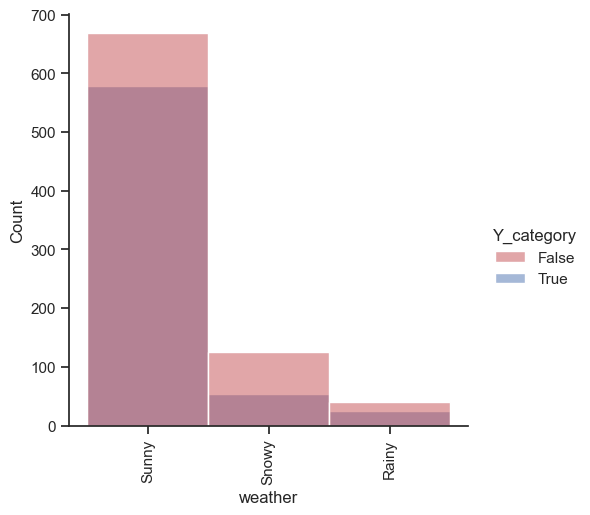

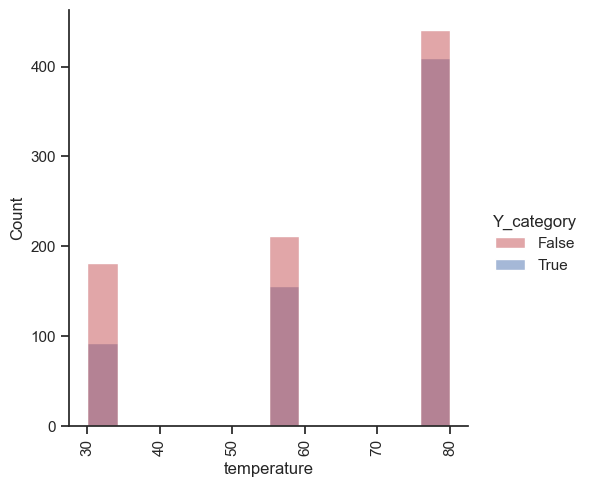

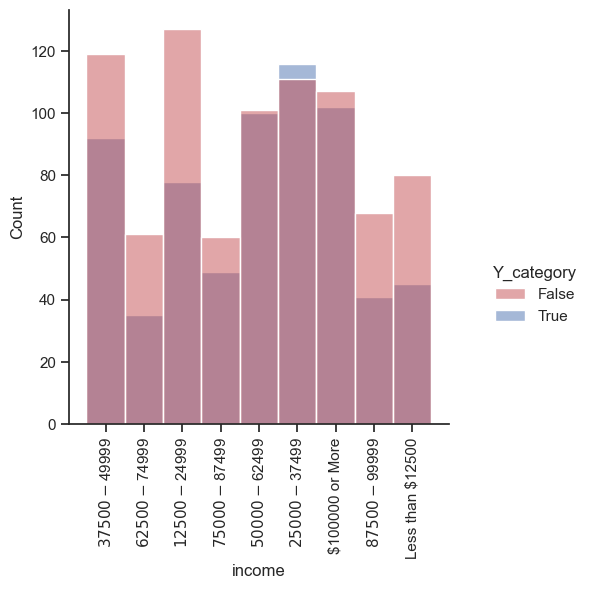

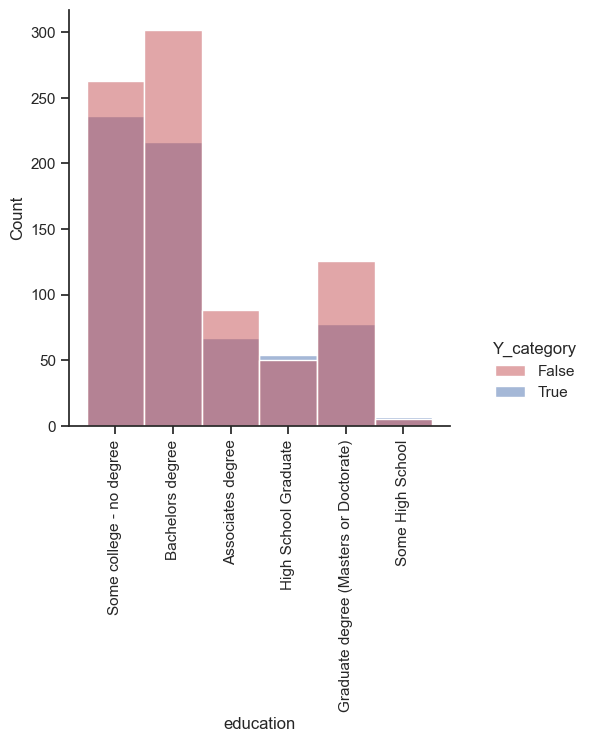

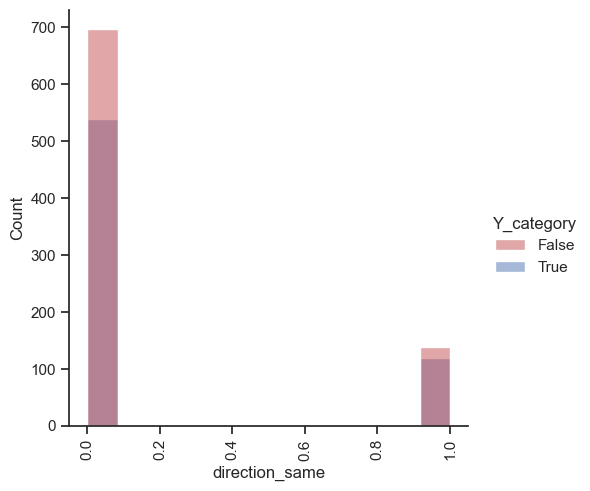

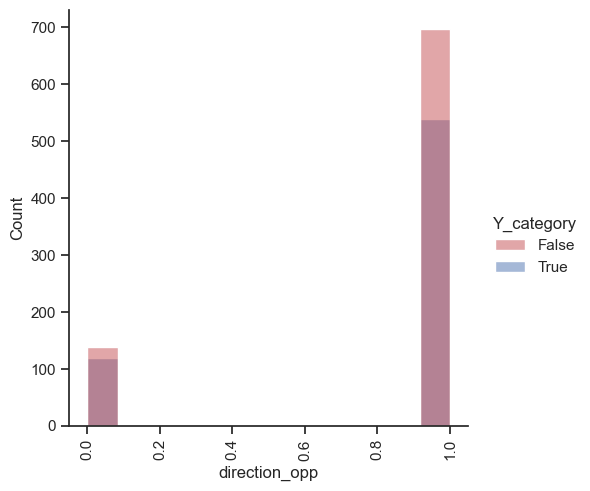

In [114]:
columns = ['weather', 'temperature', 'income', 'education', 'direction_same', 'direction_opp']
sns.set(style="ticks", color_codes=True)

for col in columns:
    fig = sns.displot(expensive_restaurant_coupons_df, x=col, hue='Y_category', palette=["r", "b"])
    fig.tick_params(axis='x', rotation=90)

In [116]:
summer_df = expensive_restaurant_coupons_df.query("weather == 'Sunny'")
summer_acceptance_rate = acceptance_rate(summer_df)
print(summer_acceptance_rate)

0.46431435445068164


In [122]:
income_df = expensive_restaurant_coupons_df.query("income in ('$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More')")

higher_income_acceptance_rate = acceptance_rate(income_df)
print(higher_income_acceptance_rate)

0.4516574585635359


In [123]:
expensive_restaurant_coupons_df['direction_same'].unique()

array([0, 1])

In [124]:
same_dir_df = expensive_restaurant_coupons_df.query('direction_same == 1')
same_dir_acceptance_rate = acceptance_rate(same_dir_df)
print(same_dir_acceptance_rate)

0.46303501945525294


In [127]:
expensive_restaurant_df = expensive_restaurant_coupons_df.query("Restaurant20To50 in ('4~8', 'gt8')")
print(acceptance_rate(expensive_restaurant_df))

0.6422764227642277


In [129]:
marital_status_df = expensive_restaurant_coupons_df.query("maritalStatus in ('Single', 'Divorced')")
print(acceptance_rate(marital_status_df))

0.45166402535657685


Lets try combining more than one category to see if we can find better segments

In [125]:
higher_income_summer_df = expensive_restaurant_coupons_df.query("income in ('$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More')").query("weather == 'Sunny'")

higher_income_summer_acceptance_rate = acceptance_rate(higher_income_summer_df)
print(higher_income_summer_acceptance_rate)

0.4765886287625418
